In [ ]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [7]:
# 2.3
df = spark.read.option("header",True).option("inferSchema",True).csv('../dataset/cardio_train_preprocessed.csv')
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



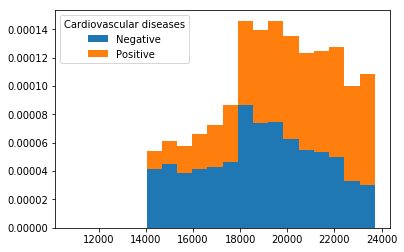

In [9]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

n_bins = 20
pds = df.toPandas()
df_cardio_0 = pds[pds["cardio"]==0]
df_cardio_1 = pds[pds["cardio"]==1]
df_cardio_label = ["Negative", "Positive"]
x = [df_cardio_0["age"], df_cardio_1["age"]]

plt.hist(x, n_bins, density=True, histtype='bar', stacked=True, label=df_cardio_label)
plt.legend(title='Cardiovascular diseases')
plt.show()

In [21]:
# One time use - upgrade pip and install packages
# import sys
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install seaborn

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.9.1-py2.py3-none-any.whl (216 kB)
     |████████████████████████████████| 26.0 MB 20.1 MB/s eta 0:00:01    |███▉                            | 3.1 MB 20.1 MB/s eta 0:00:02     |████████                        | 6.6 MB 20.1 MB/s eta 0:00:01     |████████████████████▋           | 16.7 MB 20.1 MB/s eta 0:00:01     |███████████████████████████     | 21.9 MB 20.1 MB/s eta 0:00:01


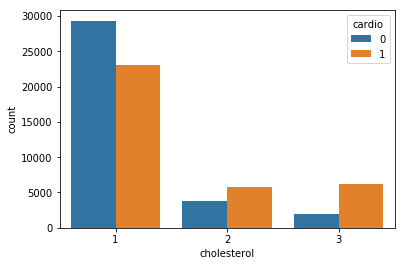

In [22]:
import seaborn as sns
ax = sns.countplot(x="cholesterol",hue="cardio",data=pds)
plt.show()

In [38]:
df = df.drop("id") # Drop id for not relevant
corr = df.toPandas().corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.show()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33341)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:33341)

In [37]:
# Reference: https://stackoverflow.com/a/44631639/10844976
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33341)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:33341)

In [1]:
#df.select([mean(c).alias(c) for c in df.columns]).show()
import pyspark.sql.functions as f
df.select(*[f.mean(c).alias(c) for c in df.columns]).show()

ImportError: No module named 'pyspark'